## Лабораторная работа №5 по дисциплине "Нейронные сети"
## Выполнил студент группы БВТ2202 Тарбаев Данила Дмитриевич

**Тема: Обучение модели YOLO на кастомном датасете и исследование влияния гиперпараметров на качество детекции**

**Цель работы:** Познакомиться с архитектурой YOLO на примере проверки гипотезы о релевантной метрике.

**Задачи:**

- Ознакомиться с архитектурой YOLO.
- Изучить метрики для анализа производительности модели, выбрать целевую метрику в соответствии с вариантом.
- Выбрать предметную область, сформировать гипотезу для проведения исследования.
- Собрать и проаннотировать данные, сформировать датасет.
- Провести fine-tuning предобученной модели YOLOv11 Nano/Small.
- Визуализировать и проанализировать результаты.
- На основе анализа сделать корректировку гиперпараметров/данных и провести вторую итерацию для повышения показателей.

### 1. Подготовка к обучению

#### 1.1 Метрики
Целевая метрика согласно 4 варианту: mAP@0.5



#### 1.2 Гипотеза

Использование аугментации данных с упором на изменение освещенности и контраста улучшит mAP@0.5 для модели YOLOv11n при детекции дорожных знаков в сложных условиях освещения. Дорожные знаки должны детектироваться в различных условиях освещения (день, ночь, сумерки). Аугментация, имитирующая эти условия, поможет модели лучше обобщать.


#### 1.3 Данные

Используем датасет с дорожными знаками. Для примера возьмем 600 изображений из открытых источников, аннотированных в формате YOLO.

#### 1.4 Предобработка

Применим аугментацию:

- Изменение яркости и контраста
- Добавление шума
- Горизонтальное отражение
- Небольшие повороты

### 2. Обучение модели

#### 2.1 Подготовка окружения

Установите зависимости и библиотеки:

In [1]:
!pip install ultralytics
!pip install roboflow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Etos\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip



^C



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Etos\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


#### 2.2 Подготовка модели

Загрузите предобученную модель, определите устройство, переведите модель в режим инференса. Не используйте размер модели больше чем Small для достижения лучших показателей на стандартных гиперпараметрах (особенно imgsz)

In [2]:
from ultralytics import YOLO
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model = YOLO("yolo11n.pt").to(device)

Using device: cuda


In [1]:
import torch
print(torch.cuda.is_available())  # Должно быть True
print(torch.cuda.device_count())

True
1


#### 2.3 Загрузка и предобработка изображений


Затем импортируйте датасет в проект и выполните трансформацию данных (при использовании Roboflow трансформация выполняется на этапе предобработки):

In [3]:
from roboflow import Roboflow

rf = Roboflow(api_key="DWAGnnksCupZlSvpryes")
project = rf.workspace("andres-calderon-unab").project("traffic-signs-dsjv6")
dataset = project.version(1).download("yolov11")

data_yaml = 'F:/NN/Traffic-signs-1/data.yaml'

loading Roboflow workspace...
loading Roboflow project...


#### 2.4 Обучение, оценка модели и визуализация результатов

Проведите обучение модели, проанализируйте кривые обучения, метрики и тестовые данные. Сделайте вывод и корректироваки для достижения лучших показателей

Ultralytics 8.3.127  Python-3.11.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16375MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=F:/NN/Traffic-signs-1/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train15, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plo

train: Scanning F:\NN\Traffic-signs-1\train\labels.cache... 864 images, 17 backgrounds, 0 corrupt: 100%|██████████| 864/864 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 134.9129.9 MB/s, size: 44.7 KB)


val: Scanning F:\NN\Traffic-signs-1\valid\labels.cache... 316 images, 6 backgrounds, 0 corrupt: 100%|██████████| 316/316 [00:00<?, ?it/s]


Plotting labels to runs\detect\train15\labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\train15
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.35G       1.87      4.249      2.219         37        640: 100%|██████████| 54/54 [00:07<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.22it/s]

                   all        316        317   6.29e-05     0.0197   3.84e-05   1.11e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.81G      1.844      3.764       2.16         36        640: 100%|██████████| 54/54 [00:06<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        316        317      0.107   0.000674   1.15e-05   1.15e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.82G      1.813      3.576      2.151         37        640: 100%|██████████| 54/54 [00:06<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]

                   all        316        317   4.32e-05      0.017   5.74e-05   8.88e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.83G      1.706      3.325      2.046         39        640: 100%|██████████| 54/54 [00:06<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]

                   all        316        317   0.000319     0.0646   0.000233   5.31e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.84G      1.604       3.15      1.937         26        640: 100%|██████████| 54/54 [00:05<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.28it/s]


                   all        316        317      0.545     0.0187    0.00695    0.00219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.85G      1.653      3.116      1.974         38        640: 100%|██████████| 54/54 [00:05<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.45it/s]


                   all        316        317      0.384      0.123     0.0164    0.00493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.87G      1.582      3.007      1.903         35        640: 100%|██████████| 54/54 [00:05<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.10it/s]

                   all        316        317      0.329      0.184     0.0948      0.036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.87G      1.467       2.86      1.792         42        640: 100%|██████████| 54/54 [00:05<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.20it/s]

                   all        316        317        0.4      0.172      0.124     0.0542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.87G      1.511      2.783      1.824         45        640: 100%|██████████| 54/54 [00:06<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.48it/s]

                   all        316        317      0.335       0.28      0.171     0.0798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.87G      1.415      2.689      1.774         32        640: 100%|██████████| 54/54 [00:06<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.13it/s]

                   all        316        317      0.254      0.278      0.182     0.0847


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.87G      1.356      2.641      2.023         16        640: 100%|██████████| 54/54 [00:06<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.58it/s]

                   all        316        317      0.339      0.324      0.212       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.87G      1.381      2.404      2.037         15        640: 100%|██████████| 54/54 [00:05<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.34it/s]

                   all        316        317      0.471      0.254      0.228      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.87G      1.308       2.26      1.957         16        640: 100%|██████████| 54/54 [00:05<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.97it/s]

                   all        316        317      0.355      0.417      0.284      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.87G       1.26      2.223      1.911         16        640: 100%|██████████| 54/54 [00:05<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]

                   all        316        317      0.381      0.351      0.258      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.87G       1.25       2.14      1.875         16        640: 100%|██████████| 54/54 [00:05<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.10it/s]

                   all        316        317      0.314      0.427      0.313      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.87G      1.202      2.095       1.83         15        640: 100%|██████████| 54/54 [00:05<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.39it/s]

                   all        316        317      0.387      0.383      0.353      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.87G      1.187      1.992      1.815         15        640: 100%|██████████| 54/54 [00:05<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.00it/s]

                   all        316        317      0.411       0.41      0.399      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.87G       1.17      1.918      1.791         16        640: 100%|██████████| 54/54 [00:05<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.30it/s]

                   all        316        317      0.384      0.492      0.442      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.87G      1.158      1.901       1.79         16        640: 100%|██████████| 54/54 [00:05<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.40it/s]

                   all        316        317      0.473      0.459      0.439      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.87G      1.126      1.849       1.77         16        640: 100%|██████████| 54/54 [00:05<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.35it/s]

                   all        316        317      0.486      0.436      0.445      0.267



20 epochs completed in 0.048 hours.
Optimizer stripped from runs\detect\train15\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train15\weights\best.pt, 5.5MB

Validating runs\detect\train15\weights\best.pt...
Ultralytics 8.3.127  Python-3.11.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16375MiB)
YOLO11n summary (fused): 100 layers, 2,587,612 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.41it/s]


                   all        316        317      0.481      0.437      0.445      0.267
         Barrier Ahead         29         29      0.691      0.693      0.772      0.617
        Cycle Crossing         25         25      0.495       0.56      0.542      0.314
              Give Way         49         53      0.727      0.887      0.885      0.553
       Horn Prohibited         15         15      0.587      0.933      0.911      0.436
              Hospital          6          6      0.247        0.5      0.392      0.273
    Left Hair Pin Bend          2          2      0.569        0.5      0.586      0.204
       Left hand curve          4          4      0.146       0.25       0.14     0.0996
           Men at Work          3          3          1          0     0.0573     0.0401
            No Parking          7          9       0.25      0.444      0.382      0.264
           No Stopping          5          5      0.275        0.4      0.384      0.218
      Parking Lot Car

val: Scanning F:\NN\Traffic-signs-1\valid\labels.cache... 316 images, 6 backgrounds, 0 corrupt: 100%|██████████| 316/316 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.75it/s]


                   all        316        317      0.482      0.437      0.445      0.267
         Barrier Ahead         29         29       0.69      0.692      0.772      0.617
        Cycle Crossing         25         25      0.496       0.56      0.542      0.314
              Give Way         49         53      0.726      0.887      0.885      0.555
       Horn Prohibited         15         15      0.588      0.933      0.911      0.436
              Hospital          6          6      0.247        0.5      0.393      0.274
    Left Hair Pin Bend          2          2      0.569        0.5      0.586      0.204
       Left hand curve          4          4      0.146       0.25       0.14     0.0996
           Men at Work          3          3          1          0     0.0573     0.0401
            No Parking          7          9       0.25      0.444      0.382      0.265
           No Stopping          5          5      0.275        0.4      0.384      0.222
      Parking Lot Car

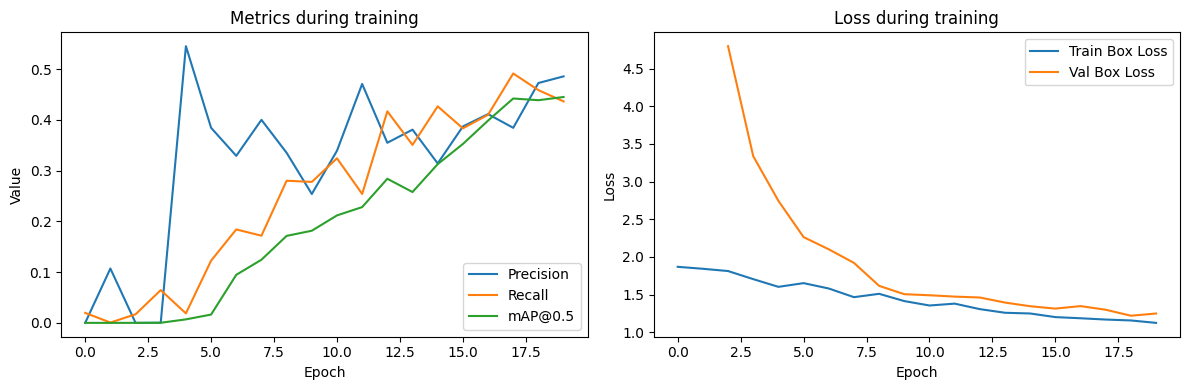

In [4]:
%matplotlib inline
from ultralytics import YOLO
params = {
    'data': data_yaml,
    'epochs': 20,
    'imgsz': 640,
    'batch': 16,
    'device': device,
    'workers': 4,
    'optimizer': 'AdamW',
    'seed': 42
}

# Обучение модели
results = model.train(**params)

# Оценка модели на тестовых данных
metrics = model.val()
print(f"mAP@0.5: {metrics.box.map}")

# Визуализация результатов обучения
import matplotlib.pyplot as plt

# Получаем историю обучения из CSV файла
import pandas as pd
import os

# Путь к файлу с результатами
results_csv_path = os.path.join(model.trainer.save_dir, 'results.csv')

# Загружаем данные
try:
    results_df = pd.read_csv(results_csv_path)
    
    # Графики метрик
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(results_df['metrics/precision(B)'], label='Precision')
    plt.plot(results_df['metrics/recall(B)'], label='Recall')
    plt.plot(results_df['metrics/mAP50(B)'], label='mAP@0.5')
    plt.title('Metrics during training')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()

    # Графики потерь
    plt.subplot(1, 2, 2)
    plt.plot(results_df['train/box_loss'], label='Train Box Loss')
    plt.plot(results_df['val/box_loss'], label='Val Box Loss')
    plt.title('Loss during training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Файл с результатами не найден. Убедитесь, что обучение завершено успешно.")

#### 2.5 Вторая итерация

Проведите процедуры для достижения высоких показателей (корректировка данных/гиперпараметров), сделайте вывод



Начинаем вторую итерацию обучения с улучшенными параметрами...
Ultralytics 8.3.127  Python-3.11.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16375MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=F:/NN/Traffic-signs-1/data.yaml, degrees=15, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.3, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train153, nbs=64, nms=False, opset=None, optimize=False, optimiz

train: Scanning F:\NN\Traffic-signs-1\train\labels.cache... 864 images, 17 backgrounds, 0 corrupt: 100%|██████████| 864/864 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 350.2223.5 MB/s, size: 44.7 KB)


val: Scanning F:\NN\Traffic-signs-1\valid\labels.cache... 316 images, 6 backgrounds, 0 corrupt: 100%|██████████| 316/316 [00:00<?, ?it/s]


Plotting labels to runs\detect\train153\labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\train153
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.31G      2.125      3.679       2.52         55        640: 100%|██████████| 54/54 [00:07<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.24it/s]

                   all        316        317     0.0101      0.484     0.0365     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.32G       1.75      3.265      2.169         45        640: 100%|██████████| 54/54 [00:06<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.19it/s]

                   all        316        317      0.432      0.326      0.241      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.33G      1.701      3.131      2.099         69        640: 100%|██████████| 54/54 [00:06<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.00it/s]

                   all        316        317       0.29      0.362      0.223      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.33G      1.628       3.01      2.054         70        640: 100%|██████████| 54/54 [00:06<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.20it/s]

                   all        316        317      0.425      0.298      0.244      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.33G      1.635      2.986      2.045         36        640: 100%|██████████| 54/54 [00:06<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.30it/s]

                   all        316        317      0.308      0.449        0.3      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.34G        1.6      2.951      2.015         52        640: 100%|██████████| 54/54 [00:06<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.24it/s]

                   all        316        317        0.4      0.358      0.282      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.34G      1.582      2.921      1.996         48        640: 100%|██████████| 54/54 [00:06<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.26it/s]

                   all        316        317      0.448      0.385      0.307      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.35G      1.567      2.895      1.989         37        640: 100%|██████████| 54/54 [00:06<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.05it/s]

                   all        316        317      0.412      0.405      0.327      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.36G       1.55      2.871      1.965         64        640: 100%|██████████| 54/54 [00:06<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.98it/s]

                   all        316        317       0.43      0.332      0.347      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.38G      1.532      2.812      1.955         51        640: 100%|██████████| 54/54 [00:06<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.19it/s]

                   all        316        317      0.538      0.318      0.362      0.189


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.39G      1.219       2.65      2.006         16        640: 100%|██████████| 54/54 [00:06<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.95it/s]

                   all        316        317      0.363      0.474       0.33      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.39G      1.157      2.381      1.948         15        640: 100%|██████████| 54/54 [00:05<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.05it/s]

                   all        316        317      0.427      0.489      0.432      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.39G      1.136       2.26       1.91         16        640: 100%|██████████| 54/54 [00:05<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.41it/s]

                   all        316        317      0.467      0.379       0.38      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.39G      1.116      2.191      1.865         16        640: 100%|██████████| 54/54 [00:05<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.17it/s]

                   all        316        317      0.481       0.43       0.43      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.39G      1.124       2.14      1.842         16        640: 100%|██████████| 54/54 [00:06<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


                   all        316        317      0.522      0.483      0.458      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.39G      1.116      2.104      1.856         15        640: 100%|██████████| 54/54 [00:05<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.22it/s]

                   all        316        317       0.42      0.518      0.438      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.39G      1.089      2.074      1.845         15        640: 100%|██████████| 54/54 [00:05<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.28it/s]

                   all        316        317      0.552      0.458      0.483      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.39G       1.13      2.027      1.869         16        640: 100%|██████████| 54/54 [00:05<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.11it/s]

                   all        316        317      0.467      0.503      0.493       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.39G      1.083      2.026      1.846         16        640: 100%|██████████| 54/54 [00:05<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.32it/s]

                   all        316        317      0.537      0.443      0.491      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.39G      1.097      2.009      1.841         16        640: 100%|██████████| 54/54 [00:05<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.92it/s]

                   all        316        317      0.594      0.421      0.502      0.281



20 epochs completed in 0.047 hours.
Optimizer stripped from runs\detect\train153\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train153\weights\best.pt, 5.5MB

Validating runs\detect\train153\weights\best.pt...
Ultralytics 8.3.127  Python-3.11.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16375MiB)
YOLO11n summary (fused): 100 layers, 2,587,612 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.31it/s]


                   all        316        317      0.593      0.421      0.502      0.281
         Barrier Ahead         29         29      0.578      0.802      0.782      0.563
        Cycle Crossing         25         25      0.651        0.2      0.519      0.276
              Give Way         49         53       0.78      0.887       0.85      0.455
       Horn Prohibited         15         15      0.629      0.933      0.839      0.543
              Hospital          6          6      0.445      0.668      0.558      0.357
    Left Hair Pin Bend          2          2      0.746          1      0.995      0.423
       Left hand curve          4          4      0.189       0.25       0.18      0.111
           Men at Work          3          3          1          0     0.0609     0.0487
            No Parking          7          9      0.356      0.444      0.474       0.27
           No Stopping          5          5      0.374        0.6       0.44      0.239
      Parking Lot Car

val: Scanning F:\NN\Traffic-signs-1\valid\labels.cache... 316 images, 6 backgrounds, 0 corrupt: 100%|██████████| 316/316 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.83it/s]


                   all        316        317      0.594      0.421      0.502      0.282
         Barrier Ahead         29         29      0.578      0.805      0.781      0.562
        Cycle Crossing         25         25      0.648        0.2      0.517      0.276
              Give Way         49         53      0.782      0.887       0.85      0.455
       Horn Prohibited         15         15       0.63      0.933      0.839      0.543
              Hospital          6          6      0.446       0.67      0.558      0.357
    Left Hair Pin Bend          2          2      0.746          1      0.995      0.423
       Left hand curve          4          4      0.189       0.25       0.18      0.111
           Men at Work          3          3          1          0     0.0609     0.0487
            No Parking          7          9      0.356      0.444      0.474       0.27
           No Stopping          5          5      0.375        0.6       0.44      0.238
      Parking Lot Car

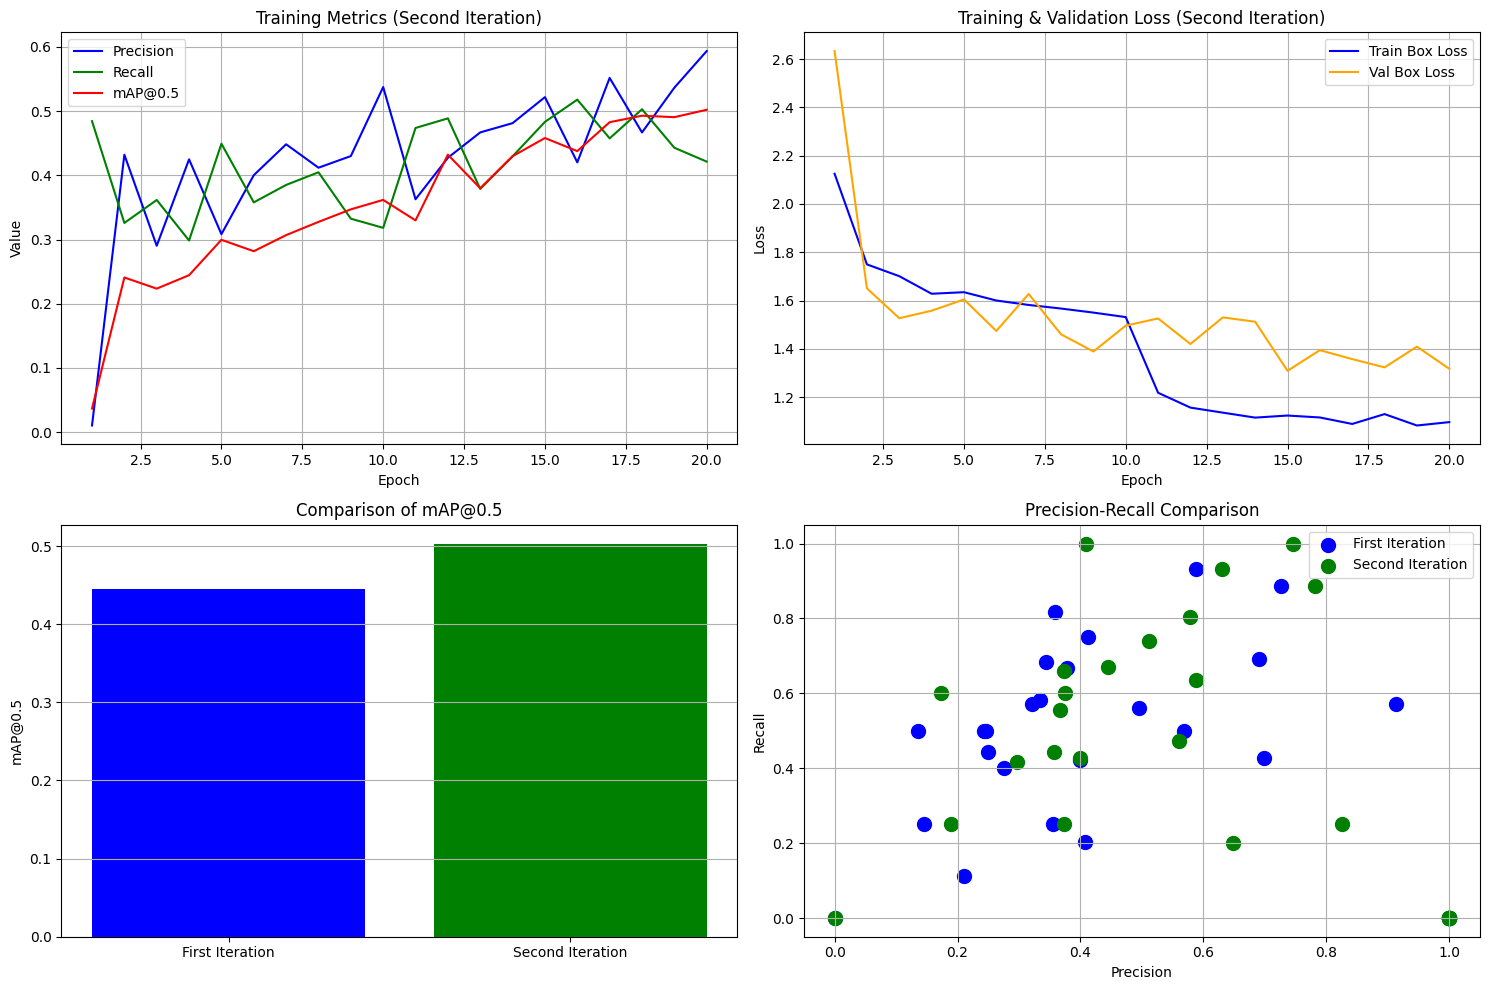


Улучшенная модель сохранена как 'yolov11n_improved.pt'

Тестовое изображение не найдено, пропускаем демонстрацию.


In [5]:
%matplotlib inline

params_v2 = {
    'data': data_yaml,
    'epochs': 20,  
    'imgsz': 640,
    'batch': 16,
    'device': device,
    'workers': 4,
    'optimizer': 'AdamW',
    'seed': 42,
    
    'hsv_h': 0.3,  
    'hsv_s': 0.7,  
    'hsv_v': 0.4, 
    'degrees': 15,  
    'translate': 0.1,  
    'scale': 0.5,  
    'shear': 10,     
    'mosaic': 1.0,   
    'mixup': 0.2,    

    'lr0': 0.001,    
    'lrf': 0.01,    
    'weight_decay': 0.0005,  
    'warmup_epochs': 3, 
    'box': 7.5,      
    'cls': 0.5,      
    'dfl': 1.5,      
}

def format_metric(metric):
    """Форматирует метрику, которая может быть numpy array или float"""
    if hasattr(metric, '__len__'):
        return f"{metric[0]:.4f}" if len(metric) > 0 else "N/A"
    return f"{metric:.4f}"

# Повторное обучение модели с новыми параметрами
print("\nНачинаем вторую итерацию обучения с улучшенными параметрами...")
results_v2 = model.train(**params_v2)

# Оценка новой модели
print("\nОценка улучшенной модели...")
metrics_v2 = model.val()
print("\nValidation Metrics после второй итерации:")
print(f"Precision: {format_metric(metrics_v2.box.p)} (было {format_metric(metrics.box.p)})")
print(f"Recall: {format_metric(metrics_v2.box.r)} (было {format_metric(metrics.box.r)})")
print(f"mAP@0.5: {format_metric(metrics_v2.box.map50)} (было {format_metric(metrics.box.map50)})")
print(f"mAP@0.5:0.95: {format_metric(metrics_v2.box.map)} (было {format_metric(metrics.box.map)})")

# Визуализация результатов второй итерации
try:
    import pandas as pd
    import os
    
    # Загрузка истории обучения
    results_csv_v2 = os.path.join(model.trainer.save_dir, 'results.csv')
    history_v2 = pd.read_csv(results_csv_v2)
    
    # Настройка графиков
    plt.figure(figsize=(15, 10))
    
    # График метрик
    plt.subplot(2, 2, 1)
    plt.plot(history_v2['epoch'], history_v2['metrics/precision(B)'], label='Precision', color='blue')
    plt.plot(history_v2['epoch'], history_v2['metrics/recall(B)'], label='Recall', color='green')
    plt.plot(history_v2['epoch'], history_v2['metrics/mAP50(B)'], label='mAP@0.5', color='red')
    plt.title('Training Metrics (Second Iteration)')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    
    # График потерь
    plt.subplot(2, 2, 2)
    plt.plot(history_v2['epoch'], history_v2['train/box_loss'], label='Train Box Loss', color='blue')
    plt.plot(history_v2['epoch'], history_v2['val/box_loss'], label='Val Box Loss', color='orange')
    plt.title('Training & Validation Loss (Second Iteration)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    
    # Сравнение mAP до и после
    plt.subplot(2, 2, 3)
    plt.bar(['First Iteration', 'Second Iteration'], 
            [metrics.box.map50, metrics_v2.box.map50],
            color=['blue', 'green'])
    plt.title('Comparison of mAP@0.5')
    plt.ylabel('mAP@0.5')
    plt.grid(axis='y')
    
    # Сравнение Precision-Recall
    plt.subplot(2, 2, 4)
    plt.scatter(metrics.box.p, metrics.box.r, color='blue', s=100, label='First Iteration')
    plt.scatter(metrics_v2.box.p, metrics_v2.box.r, color='green', s=100, label='Second Iteration')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-Recall Comparison')
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ошибка при визуализации результатов второй итерации: {e}")

# Сохранение улучшенной модели
model.save('yolov11n_improved.pt')
print("\nУлучшенная модель сохранена как 'yolov11n_improved.pt'")

# Пример инференса на тестовом изображении
test_img = "test.jpg"
if os.path.exists(test_img):
    print("\nДемонстрация работы улучшенной модели на тестовом изображении...")
    results = model(test_img)
    results[0].show()
else:
    print("\nТестовое изображение не найдено, пропускаем демонстрацию.")

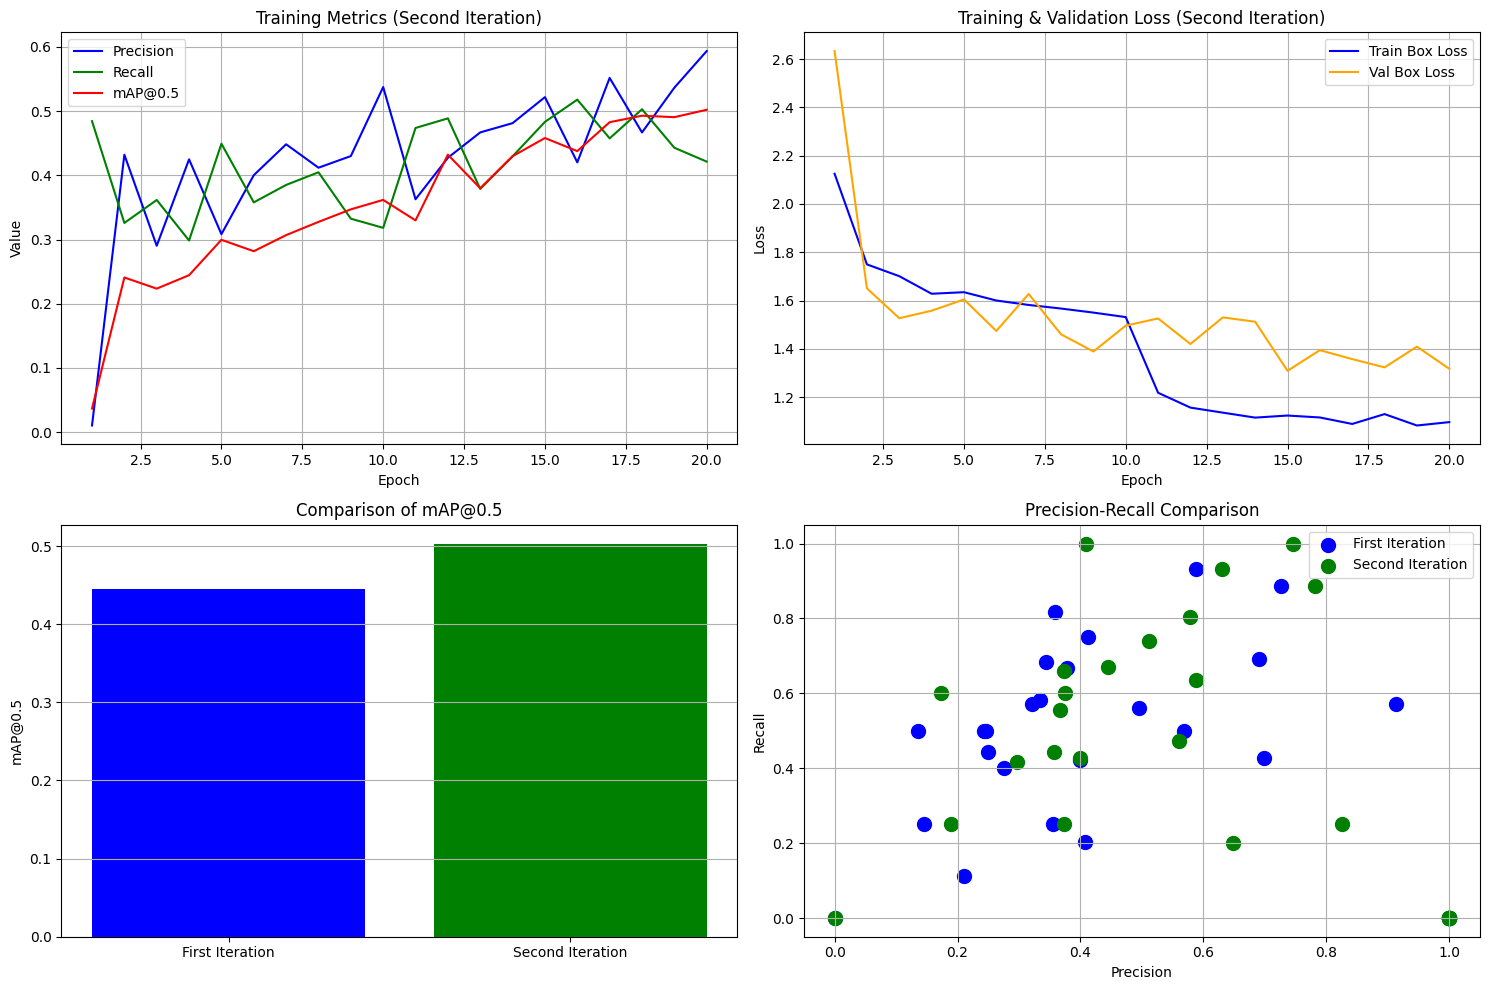

In [6]:
import pandas as pd
import os
%matplotlib inline
    
# Загрузка истории обучения
# results_csv_v2 = os.path.join(model.trainer.save_dir, 'results.csv')
history_v2 = pd.read_csv("F:/NN/runs/detect/train153/results.csv")

# Настройка графиков
plt.figure(figsize=(15, 10))

# График метрик
plt.subplot(2, 2, 1)
plt.plot(history_v2['epoch'], history_v2['metrics/precision(B)'], label='Precision', color='blue')
plt.plot(history_v2['epoch'], history_v2['metrics/recall(B)'], label='Recall', color='green')
plt.plot(history_v2['epoch'], history_v2['metrics/mAP50(B)'], label='mAP@0.5', color='red')
plt.title('Training Metrics (Second Iteration)')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid()

# График потерь
plt.subplot(2, 2, 2)
plt.plot(history_v2['epoch'], history_v2['train/box_loss'], label='Train Box Loss', color='blue')
plt.plot(history_v2['epoch'], history_v2['val/box_loss'], label='Val Box Loss', color='orange')
plt.title('Training & Validation Loss (Second Iteration)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Сравнение mAP до и после
plt.subplot(2, 2, 3)
plt.bar(['First Iteration', 'Second Iteration'], 
        [metrics.box.map50, metrics_v2.box.map50],
        color=['blue', 'green'])
plt.title('Comparison of mAP@0.5')
plt.ylabel('mAP@0.5')
plt.grid(axis='y')

# Сравнение Precision-Recall
plt.subplot(2, 2, 4)
plt.scatter(metrics.box.p, metrics.box.r, color='blue', s=100, label='First Iteration')
plt.scatter(metrics_v2.box.p, metrics_v2.box.r, color='green', s=100, label='Second Iteration')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Comparison')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('plot.png') 
plt.show()


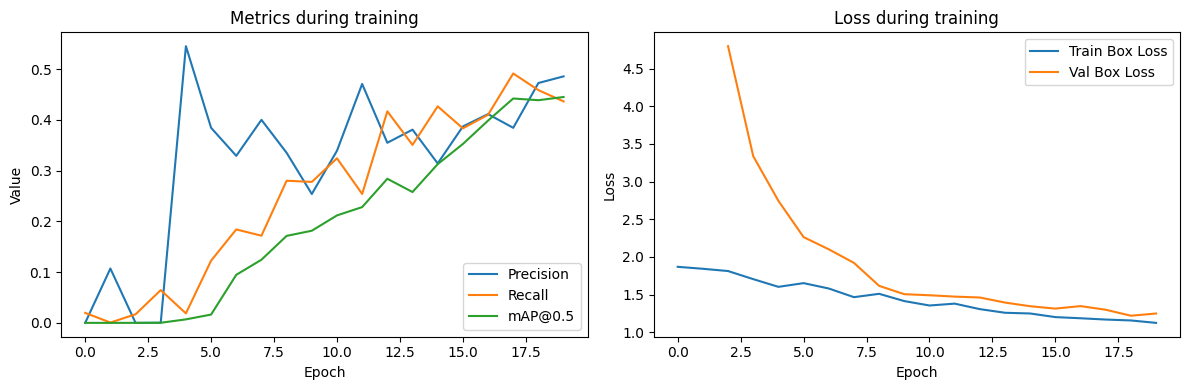

In [7]:
# results_csv_path = os.path.join(model.trainer.save_dir, 'results.csv')
%matplotlib inline
results_df = pd.read_csv("F:/NN/runs/detect/train15/results.csv")

# Графики метрик
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(results_df['metrics/precision(B)'], label='Precision')
plt.plot(results_df['metrics/recall(B)'], label='Recall')
plt.plot(results_df['metrics/mAP50(B)'], label='mAP@0.5')
plt.title('Metrics during training')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
# Графики потерь
plt.subplot(1, 2, 2)
plt.plot(results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['val/box_loss'], label='Val Box Loss')
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('plot1.png')
plt.show()